In [1]:
#imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from astropy.io import ascii
from matplotlib.patches import Rectangle
from matplotlib.patheffects import Stroke

In [ ]:
#We used Epoch 2 and 3 of radio data to make this plot eventually for paper submission
#Mdot_max = 203.4267 #1e-5 solar mass per year
#Mdot_min = 14.625 #1e-5 solar mass per year

/var/folders/7p/mf_3kv8n7_b0_mszg1x7xcpm0000gn/T/ipykernel_4180/919139544.py:33: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  new_shape = so.cascaded_union([ringa, ringb, ringc, ringd])


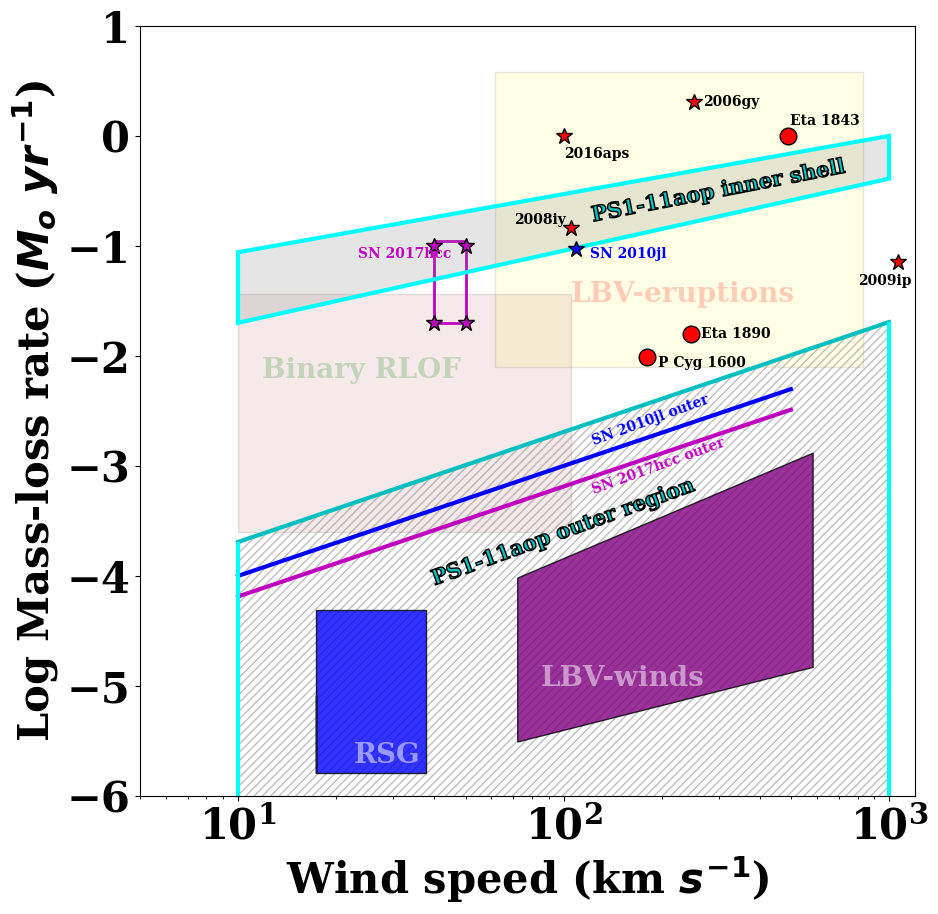

In [5]:
from matplotlib import pyplot as plt
from shapely.geometry.polygon import LinearRing, Polygon
import shapely.ops as so
from descartes import PolygonPatch

plt.rcParams["font.family"] = "serif"
plt.rcParams.update({'font.size': 10})
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)
from matplotlib import rc,rcParams
rc('font', weight='bold')

#RGB
ringa = Polygon([(17.40903215501481, -5.080859166627278),(17.40903215501481, -5.790022755356287),(17.40903215501481, -4.311667353153677),
                    (37.82892445901859, -4.311667353153677),(37.82892445901859, -5.311667353153677), 
                    (37.82892445901859, -5.790022755356287),
                    (17.40903215501481, -5.790022755356287)])

#LBV-Erup
ringb = Polygon([(61.373875968646395,0.5782696475958342),(831.3986484478344,0.5782696475958342),
                    (831.3986484478344,-2.0968014206904924),(61.373875968646395, -2.0968014206904924)])

#LBV-wind
ringc = Polygon([(72.31595912088636, -4.019426456984273),(583.9778143612374, -2.8841907668622584),
                    (583.9778143612374, -4.831360527222023),(72.31595912088636, -5.5098347704545)])

#binary
ringd = Polygon([(10.016805748499927, -1.440474823932962),(105.49898381873706,-1.440474823932962),
                    (105.49898381873706,-3.6038879923293523),(10.016805748499927,-3.6038879923293523)])

fig, axs = plt.subplots(figsize=(10,10))

new_shape = so.cascaded_union([ringa, ringb, ringc, ringd])

#axs.set_aspect('equal', 'datalim')
#for geom in new_shape.geoms: 
geom0 = new_shape.geoms[0]
xs, ys = geom0.exterior.xy    
#axs.fill(xs, ys, alpha=0.1, fc='g', ec='red')

geom1 = new_shape.geoms[1]
xs, ys = geom1.exterior.xy    
#axs.fill(xs, ys, alpha=0.1, fc='b', ec='red',zorder=1)

geom2 = new_shape.geoms[2]
xs, ys = geom2.exterior.xy    
#axs.fill(xs, ys, alpha=0.1, fc='orange', ec='red')

poly1patch = PolygonPatch(ringa, fc='b', alpha=0.8, zorder=1)
poly2patch = PolygonPatch(ringb, fc='yellow', alpha=0.1, zorder=0)
poly3patch = PolygonPatch(ringc, fc='purple', alpha=0.8, zorder=1)
poly4patch = PolygonPatch(ringd, fc='brown', alpha=0.1, zorder=0)

axs.add_patch(poly1patch)
axs.add_patch(poly2patch)
axs.add_patch(poly3patch)
axs.add_patch(poly4patch)
#w = Mdot/wind-speed = 1e15 g/cm
wind = np.arange(-30,1000,10)
Mdot = (1e15*wind*1000)/6.307e+25 
#axs.plot(wind,np.log(Mdot))

#axs.plot([4.937991285358249,1594.3260212675523],[-4.304635761589404,-1.7880794701986753], color ='black',linestyle = '--')
#axs.plot([4.98621945778667,1363.0966210200456], [-3.3885209713024276, -0.9492273730684326],color ='black')



#sn

axs.plot(180.7460712792875, -2.0088300220750552,'or',markersize=12,markeredgecolor='k')
axs.text(194.7460712792875, -2.1, 'P Cyg 1600')

axs.plot(246.1608787544737, -1.7991169977924946,'or',markersize=12,markeredgecolor='k')
axs.text(265.1608787544737,-1.83393649058713,'Eta 1890')

axs.plot(250.82797161935267, 0.3090507726269315,'*r',markersize=12,markeredgecolor='k')
axs.text(267.82797161935267,0.280242251732146, '2006gy')

axs.plot(488.7661077410801, 0,'or',markersize=12,markeredgecolor='k')
plt.text(495.7661077410801,0.1,'Eta 1843')

axs.plot(105.51190085042357, -0.8388520971302431,'*r',markersize=12,markeredgecolor='k')
axs.text(70.51190085042357,-0.7982569505817180, '2008iy')


vb = np.arange(10,500) 
plt.plot(vb,np.log10((1e-3/100)*vb),color='b',lw=3)

#2017hcc: wind speed =[40,50], mass loss = [0.02,0.1]
axs.plot(40, np.log10(0.02),'*m',markersize=12,markeredgecolor='k')
axs.plot(50, np.log10(0.02),'*m',markersize=12,markeredgecolor='k')
axs.plot(40, np.log10(0.1),'*m',markersize=12,markeredgecolor='k')
axs.plot(50, np.log10(0.1),'*m',markersize=12,markeredgecolor='k')
#Rectangle((x1, y1), dx, dy)
axs.add_patch(Rectangle((40, np.log10(0.02)), 10, np.log10(5.5),edgecolor = 'm',
             facecolor = 'r',
             fill=False,
             lw=2))
#IR
#axs.plot(50, np.log10(2e-3),'*r',markersize=12,markeredgecolor='k')
#radio
#axs.plot(100, np.log10(6.5e-4),'*r',markersize=12,markeredgecolor='b')
vs = np.arange(10,500) 
plt.plot(vs,np.log10((6.5e-4/100)*vs),color='m',lw=3)
#axs.vlines(50,np.log10(2e-3),np.log10(6.5e-4),'r')
axs.text(23.39545127581218,-1.10204837664059,'SN 2017hcc',color='m')
axs.text(120.39545127581218,-3.2504837664059,'SN 2017hcc outer',color='m',rotation =20, fontsize =10) #sparse

axs.plot(1062.1964822293469, -1.1479028697571745,'*r',markersize=12,markeredgecolor='k')
axs.text(800.1964822293469,-1.350348652285743,'2009ip')

axs.plot(100, 0,'*r',markersize=12,markeredgecolor='k')
axs.text(100,-0.2,'2016aps')

#axs.text(500.41130325442,-1.00348652285743,r'$w = 5e16$ $(g/cm)$')
#axs.text(500.41130325442,-2.400008652285743,r'$w = 5e15$ $(g/cm)$')

#PS1-11aop
v = 100 #km/s

#CSM model (MOSFiT)
R1 = 1e14
d1 = 5.49*10.**(-12)  #gcm^-3
va = np.arange(80,800) #km/s
#va = np.arange(50,100) #km/s
Mcgs1 = d1*4*np.pi*R1**2*va*1e5
Mdcsm = Mcgs1/6.307e+25  #in solar mass per year

#CSM + Ni model (MOSFiT)
R2 = 1e14 #cm
d2 = 2.57*10.**(-12) #gcm^-3
Mcgs2 = d2*4*np.pi*R2**2*va*1e5
Mdcsmni = Mcgs2/6.307e+25  #in solar mass per year
#print(Mdcsmni,Mdcsm)

#Simple CSM model 
Mdsimple = [0.02,1] #in solar mass per year


#shade the inner dense shell
#plt.vlines(x = 80, ymin = min(np.log10(Mdcsmni)), ymax = min(np.log10(Mdcsm)),colors = 'cyan',lw=3)
#plt.vlines(x = 600, ymin = max(np.log10(Mdcsmni)), ymax = max(np.log10(Mdcsm)),colors = 'cyan',lw=3)
#plt.plot([80,600],[min(np.log10(Mdcsmni)),max(np.log10(Mdcsmni))],color='cyan',markeredgecolor='k',lw=3,)
#plt.plot([80,600],[min(np.log10(Mdcsm)),max(np.log10(Mdcsm))],color='cyan',markeredgecolor='k',lw=3,)
#plt.fill([80,600,600,80], [min(np.log10(Mdcsm)),max(np.log10(Mdcsm)),max(np.log10(Mdcsmni)),min(np.log10(Mdcsmni))], 'gray', alpha=0.2, edgecolor='r')

#shade the inner dense shell with simple CSM model max(Mdcsm), min(Mdcsmni)
plt.vlines(x = 10, ymin = np.log10(Mdsimple[0]), ymax = min(np.log10(Mdcsm)),colors = 'cyan',lw=3)
plt.vlines(x = 1000, ymin = max(np.log10(Mdcsmni)), ymax = np.log10(Mdsimple[1]),colors = 'cyan',lw=3)
plt.plot([10,1000],[np.log10(Mdsimple[0]),max(np.log10(Mdcsmni))],color='cyan',markeredgecolor='k',lw=3,)
plt.plot([10,1000],[min(np.log10(Mdcsm)),np.log10(Mdsimple[1])],color='cyan',markeredgecolor='k',lw=3,)
plt.fill([10,1000,1000,10], [min(np.log10(Mdcsm)),np.log10(Mdsimple[1]),max(np.log10(Mdcsmni)),np.log10(Mdsimple[0])], 'gray', alpha=0.2, edgecolor='r')

#plt.text(120,-0.8,'PS1-11aop inner shell', fontsize = 15, rotation =11)
plt.text(300,-0.5, 'PS1-11aop inner shell', 
        ha='center', va='center',color='c', rotation =11, fontsize =15,
        path_effects=[Stroke(linewidth=1, foreground='k')])
#plt.text(300,-0.5, 'PS1-11aop inner shell', 
#        ha='center', va='center', rotation =11, fontsize =15,
#        bbox=dict(facecolor='cyan', edgecolor='black', boxstyle='round'))

#plt.text(200,-0.8,'PS1-11aop', fontsize = 15)
#plt.text(200,-1.0,'inner dense', fontsize = 15)
#plt.text(200,-1.2,'shell', fontsize = 15)

axs.plot(109.39545127581218, -1.0264900662251657,'*b',markersize=12,markeredgecolor='k')
axs.text(120.39545127581218,-1.10204837664059,'SN 2010jl',color='b') #dense
axs.text(120.39545127581218,-2.80204837664059,'SN 2010jl outer',color='b',rotation =20, fontsize =10) #sparse

#shade the windy outer region (0.0001462539420398745, 0.0066402697477597715)
vr = np.arange(10,1000)  #wind speed
Mradmax = 203.4267*1e-5 #26.450863693180743*1e-5 #2.4e-4 #26.450863 #2.4e-4
Mradmin = 14.625*1e-5  #1.6141202072445873*1e-5 #6.1e-5 #1.61412 #6.1e-5
Mmaxplot = Mradmax/100 
Mminplot = Mradmin/100 
M2 = Mmaxplot*vr
M1 = Mminplot*vr
plt.plot(vr,np.log10(M2),color='c',lw=3)
#plt.plot(vr,np.log10(M1),color='c',lw=3)
#plt.plot([10,500],[np.log10(Mradmax),np.log10(Mradmin)],color='r',linestyle=':')
#plt.plot([10,500],[np.log10(9.9e-5),np.log10(7e-5)],color='pink',linestyle=':')
#plt.plot([10,500],[np.log10(11.1e-5),np.log10(6.8e-5)],color='m',linestyle=':')
#plt.vlines(x = 100, ymin = np.log10(M2mean), ymax = np.log10(M1mean),colors = 'blue')
#plt.vlines(x = 300, ymin = np.log10(M2mean), ymax = np.log10(M1mean),colors = 'blue')

#fill([100,300,300,100], [np.log10(M1mean),np.log10(M1mean),np.log10(M2mean),np.log10(M2mean)], 'pink', alpha=0.2, edgecolor='r')
#plt.text(20,-5.0,'PS1-11aop outer region', fontsize = 20, rotation =18)
# Add text with a border
#plt.text(50,-4.0, 'PS1-11aop outer region', 
#        ha='center', va='center', rotation =18,
#        bbox=dict(facecolor='cyan', edgecolor='black', boxstyle='round'))
plt.text(100,-3.6, 'PS1-11aop outer region', 
        ha='center', va='center',color='c', rotation =20, fontsize =15,
        path_effects=[Stroke(linewidth=1, foreground='k')])

#plt.text(50,-4.0, 'PS1-11aop outer region', 
#        ha='center', va='center', rotation =18, fontsize =20,
#        path_effects=[Stroke(linewidth=1, foreground='cyan')])

plt.vlines(x = 10, ymin = np.log10(np.min(M2)), ymax = -8,colors = 'cyan',lw=3)
plt.vlines(x = 1000, ymin = np.log10(np.max(M2)), ymax = -8,colors = 'cyan',lw=3)
#plt.plot([10,1000],[np.log10(Mdsimple[0]),max(np.log10(Mdcsmni))],color='cyan',markeredgecolor='k',lw=3,)
#plt.plot([10,1000],[min(np.log10(Mdcsm)),np.log10(Mdsimple[1])],color='cyan',markeredgecolor='k',lw=3,)
#plt.fill([10,1000,1000,10], [np.log10(14.625*1e-5),np.log10(Mdsimple[1]),max(np.log10(Mdcsmni)),np.log10(Mdsimple[0])], 'gray', alpha=0.2, edgecolor='r')
simple_x4 = [10,10,1000,1000]
simple_y4 = [np.log10(np.min(M2)), -8, -8, np.log10(np.max(M2))]
plt.fill(simple_x4,simple_y4,facecolor='none', hatch='////', edgecolor='gray',alpha=0.5, zorder=0)


plt.text(105.45422633656347,-1.5002569505817180,'LBV-eruptions',color ='red', fontsize = 20, alpha = 0.2, fontweight ='bold')
plt.text(84.82227282331738,-5.000,'LBV-winds',color ='white', fontsize = 20, alpha = 0.5, fontweight ='bold')
plt.text(11.839166449719833,-2.2,'Binary RLOF',color ='green', fontsize = 20, alpha = 0.2, fontweight ='bold')
plt.text(22.735690893610602,-5.7,'RSG',color ='white', fontsize = 20, alpha = 0.5, fontweight ='bold')
#Add arrows to indicate upper limit
#plt.arrow(10, np.log10(min(M2)),0, -np.log10(2), head_width=1, head_length=0.1 , color='c')
#plt.arrow(20, np.log10(0.0004253),0, -np.log10(2), head_width=2, head_length=0.1 , color='c')
#plt.arrow(50, np.log10(0.000933),0, -np.log10(2), head_width=5, head_length=0.1 , color='c')
#plt.arrow(100, np.log10(0.001893),0, -np.log10(2), head_width=10, head_length=0.1 , color='c')
#plt.arrow(200, np.log10(0.004253),0, -np.log10(2), color='c',head_width=20, head_length=0.1 )
#plt.arrow(500, np.log10(np.median(M2)),0, -np.log10(2), head_width=40, head_length=0.1 , color='c')
#plt.arrow(1000, np.log10(max(M2)),0, -np.log10(2), head_width=80, head_length=0.1 , color='c')


#print(np.median(M2))
#plt.legend(fontsize=15)
axs.set_xscale('log')
#axs.xaxis.set_ticks(np.arange(0, 1200))
axs.set_xlim(5,1200)
axs.set_ylim(-6,1)
plt.xlabel(r'Wind speed (km $s^{-1}$)', fontsize = 30, fontweight='bold')
plt.ylabel(r'Log Mass-loss rate ($M_{o}$ $yr^{-1}$)',fontsize = 30,fontweight='bold')
plt.tick_params(labelsize = 30)
plt.savefig('nathan-smith.png',bbox_inches='tight',dpi = 500, transparent = True)
#plt.show()


In [35]:
7.4-4.7

2.7

In [7]:
np.log10(40), np.log10(0.02)

(1.6020599913279623, -1.6989700043360187)

In [1]:
va = 1000

#optical CSM
#R1 = (1e14+2.32e15)/2  #cm
#d1 = ((5.49*10.**(-12))+(5.03E-13))/2  #gcm^-3

R1 = 1e14
d1 = 5.49*10.**(-12)  #gcm^-3
#va = np.arange(80,600) #km/s
#va = np.arange(50,100) #km/s
Mcgs1 = d1*4*np.pi*R1**2*va*1e5
Mdcsm = Mcgs1/6.307e+25  #in solar mass per year

#optical CSM+Ni
#R2 = (1e14+3.23e15)/2  #cm
#d2 = ((2.57*10.**(-12))+(2.78E-13))/2  #gcm^-3

R2 = 1e14 #cm
d2 =2.57*10.**(-12) #gcm^-3
Mcgs2 = d2*4*np.pi*R2**2*va*1e5
Mdcsmni = Mcgs2/6.307e+25  #in solar mass per year

Mdcsm, Mdcsmni, np.log10(Mdcsm), np.log10(Mdcsmni)

NameError: name 'np' is not defined

In [ ]:
0.1, 0.05 ----inner
5.394, 5.778 ----outer

In [3]:
min(Mdcsm)

0.0875083236693602

In [4]:
max(Mdcsm), min(Mdcsmni)

0.6552185734743347

In [19]:
min(Mdcsmni)

0.04096473439531069

In [20]:
max(Mdcsmni)

0.3067234487848888

In [28]:
(10**(-6)+10**(-5))/2, 10**(-4.4)

(5.500000000000001e-06, 3.9810717055349695e-05)

In [ ]:
5.5e-4 to 5.5e-2,  5.5e-6 to 3.98e-5